# Практика: линейные алгоритмы
В этом ноутбуке мы применим линейные алгоритмы к задачам регрессии и классификации.
![alt text](https://drive.google.com/uc?id=1bb0aecCJLyVypWuU3yeAgfDt8VoGyP3u)

## Линейная регрессия

Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где у - целевая переменная (что мы хотим предсказать), $x_i$ -- признак объекта х, $w_i$ -- вес i-го признака, b -- bias (смещение, свободный член)

Часто предполагают, что объект х содержит в себе фиктивный признак, который всегда равен 1, тогда параметр $b$ соответствует весу этого признака в итоговой модели. В этом случае формула принимает простой вид:
$$ y = <w, x>. $$

В матричной форме, в случае, когда у нас есть n объектов формулу можно переписать следующим образом:
$$ Y = Xw,$$
где Y --- вектор размера n, X --- матрица объекты-признаки размера $n \times k$, a w --- вектор весов размера k.

Решение по методу наименьших квадратов дает 
$$ w = (X^TX)^{-1}X^TY $$

## Задание
Реализуйте линейную регрессию, которая вычисляет веса признаков по формуле указанной выше

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression

In [14]:
class MyLinearRegression:
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        # Принимает на вход X, y и вычисляет веса по данной выборке
        # Не забудьте про фиктивный признак равный 1!
        # ВАШ КОД ЗДЕСЬ
        l, n = X.shape
        
        ones = np.ones(l).reshape(l, 1)
        X_train = np.concatenate([X, ones], axis=1)
        
        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y.reshape(l, 1)# ВАШ КОД: реализуйте формулу для w. Используйте np.linalg.inv
        
    def predict(self, X):
        # Принимает на вход X и возвращает ответы модели
        
        # ВАШ КОД ЗДЕСЬ
        l, n = X.shape
        
        ones = np.ones(l).reshape(l, 1)
        X_test = np.concatenate([X, ones], axis=1)
        
        y_pred = (X_test @ self.w).ravel() #w.shape = (n, 1)
        
        #ВАШ КОД: посчитайте предсказания. Используйте матричное умножение: @
        return y_pred
    
    def get_weights(self):
        return self.w

Протестируем нашу модель на искуственных данных

In [4]:
X = np.linspace(-5, 5, 100)
y = 10 * X - 7

X_train = X[0::2].reshape(-1, 1)
y_train = y[0::2] + np.random.randn(50) * 10
X_test = X[1::2].reshape(-1, 1)
y_test = y[1::2] + np.random.randn(50) * 10

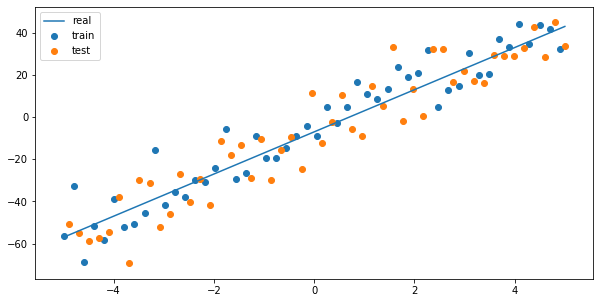

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

In [8]:
X_train.shape

(50, 1)

In [9]:
y_train.shape

(50,)

In [15]:
model = MyLinearRegression()

In [16]:
model.fit(X_train, y_train)

In [17]:
model.get_weights()

array([[10.17257639],
       [-5.35670709]])

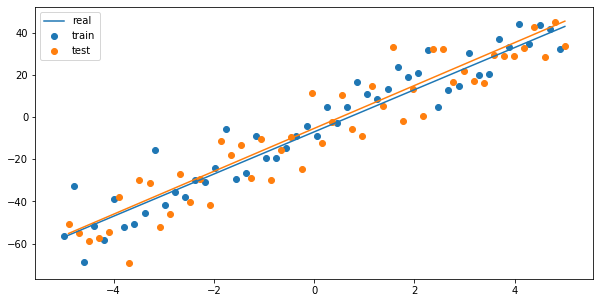

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')

plt.plot(X_test, model.predict(X_test))


plt.legend()
plt.show()

### Загрузка датасета
Загрузим набор данных, с которым мы будем работать. В библиотеке scikit-learn есть множество тренировочных наборов данных для освоения и проверки методов машинного обучения. Мы будем работать с датасетом Boston. Этот датасет описывает средние цены на недвижимость в микрорайонах Бостона в $1000. 
Примеры признаков микрорайона: количество преступлений на душу населения, процент старых домов в районе, среднее количество учеников на одного учителя и т.д.

![alt text](https://drive.google.com/uc?id=1uD19MPXfdXnNrvTU9rU2IO5cRlM4QfW7)

Стандартные наборы данных в scikit-learn находятся в модуле sklearn.datasets.

In [19]:
from sklearn.datasets import load_boston

In [20]:
house_data = load_boston()
print(house_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Выделение данных и анализ

Выделим матрицу объекты-признаки в переменную $X$, правильные ответы --- в переменную $y$. Используем библиотеку pandas. Для отображения информации о наборе данных используем функцию pd.describe, которая отображает полезные статистики из набора: средние значения признаков, минимум, максимум, медиану и др.

In [21]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Визуализируем распределения признаков в датасете

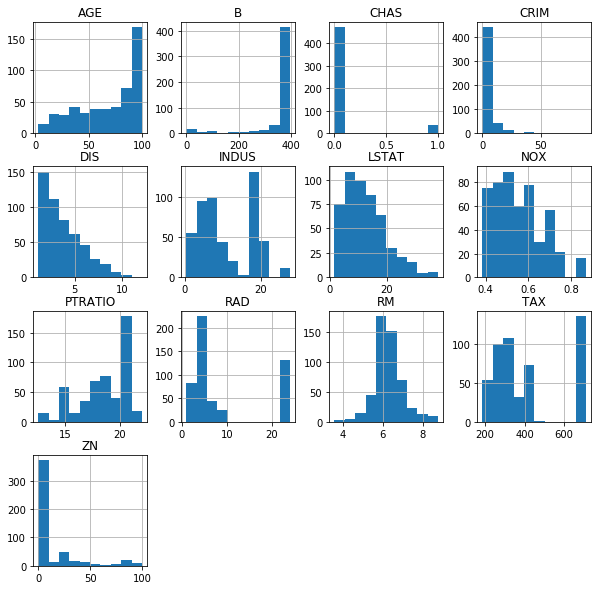

In [22]:
X.hist(X.columns, figsize=(10, 10));

Линейные алгоритмы часто сталкиваются с проблемой мультиколлинеарности признаков --- когда два или больше признаков оказываются близкими к линейно зависимым. Это, в частности, проявляется в том, что матрица $X$ становится необратимой, а, значит, в решении задачи линейной регрессией в формуле мы не можем вычислить $X^{-1}$. Эту проблему на практике обходят численными методами оптимизации, но решение задачи методом линейной регрессии по-прежнему может оказаться нестабильным. 

Проблему мультиколлинеарности устранить не так просто, но можно по крайней мере проверить, что никакие два признака не являются линейно зависимыми. В случае, если два признака оказываются линейно зависимыми, один из них (тот, который имеет меньшее влияние на целевую переменную $y$ может быть удалён из рассмотрения.

На практике линейную зависимость признаков можно выявить, посчитав матрицу корреляций признаков между собой. Сделать это нам поможет функция .corr() в padnas, а также модуль seaborn.

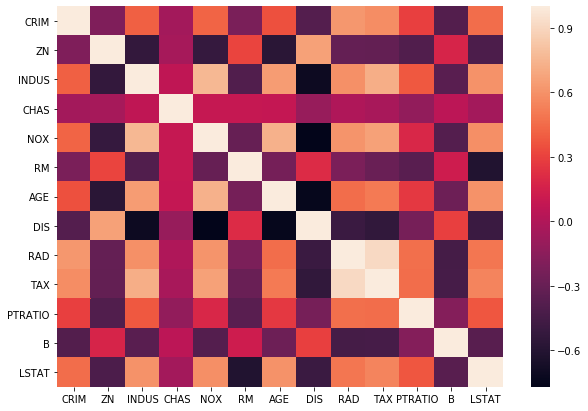

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(10,7))
sns.heatmap(X.corr())

Если два признака имеют слишком большую или слишком маленькую корреляцию, их целесообразно удалить из датасета. Здесь лишь два признака имеют высокую корреляцию --- около 0.8. Один из этих признаков можно было бы удалить из рассмотрения, но мы сейчас это делать не будем, так как 0.8 --- не критичное значение.

Разобьём данные на train и test в соотношении 70:30. Используем функцию sklearn.model_selection.train_test_split.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Линейные алгоритмы восприимчивы к масштабу данных: они работают лучше, если все признаки имеют примерно одинаковую дисперсию. Отнормируем данные с помощью объекта StandardScaler из модуля sklearn.preprocessing.

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
np.min(X_train_scaled, axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
np.max(X_train_scaled, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [30]:
np.min(X_test_scaled, axis=0)

array([ 8.18254447e-05,  0.00000000e+00,  2.74926686e-02,  0.00000000e+00,
       -8.29875519e-03,  1.83560069e-01, -3.29787234e-02,  6.62004747e-03,
        0.00000000e+00,  1.90839695e-03,  4.25531915e-02,  5.74915528e-03,
        6.89845475e-03])

### Обучение линейной регрессии

Теперь всё готово для обучения. Линейная регрессия находится в модуле sklearn.linear_model. Обучим линейную регрессию на X_train и предскажем значения на X_test. 

In [ ]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_train_prediction = model.predict(X_train_scaled)
y_test_prediction = model.predict(X_test_scaled)

Виуализируем получившиеся веса алгоритма.

<BarContainer object of 13 artists>

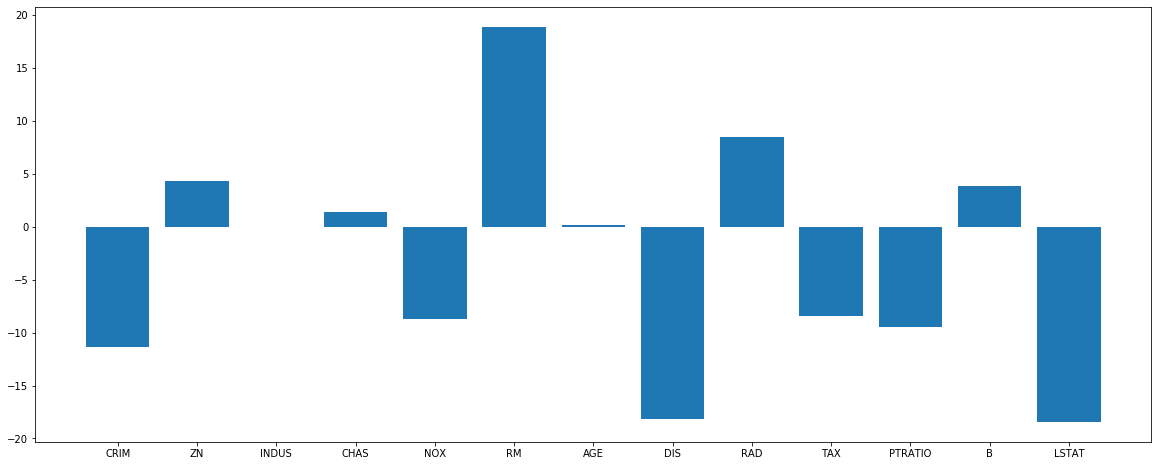

In [32]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

### Оценка качества алгоритма

Для оценки качества работы алгоритма нам необходимы метрики. Мы посчитаем среднюю квадратичную ошиюбку: $$MSE = \frac{1}{n}\sum{(y_{true} - y_{pred})^2}$$ и среднюю абсолютную ошибку: $$MAE = \frac{1}{n}\sum{|y_{true} - y_{pred}|}.$$

Функции вычисления ошибок находятся в модуле sklearn.metrics.

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(f'Train MSE: {mean_squared_error(y_train, y_train_prediction)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_prediction)}')

print(f'Train MAE: {mean_absolute_error(y_train, y_train_prediction)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_test_prediction)}')

Train MSE: 22.15301392101602
Test MSE: 22.17563028197484
Train MAE: 3.3540430505310757
Test MAE: 3.226977239670801


In [34]:
y.mean()

22.532806324110677

### Кросс-валидация
Иногда просто разбиение на обучающую и тестовую выборки не даёт точного прогноза оценки ошибки, ведь обученный алгоритм может сильно меняться в зависимости от обучающей выборки. Чтобы нивелировать эффект конкретной обучающей выборки, используют так называему кросс-валидацию. Идея кросс-валидации состоит в том, чтобы разбить все данные на несколько одинаковых частей, поочерёдно используя каждую часть как test, а оставшийся датасет --- как train. На каждом из экспериментов вычисляют тестовую ошибку, затем результат усредняют по всем экспериментам.

![alt text](https://drive.google.com/uc?id=11TVMLDP-oc6-HyO7a_Jteyvpb_KzqaM5)

Выполним эту схему на нашем датасете. Кросс-валидация находится в модуле sklearn.model_selection.

In [35]:
from sklearn.model_selection import cross_val_score

In [38]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [41]:
val_model = LinearRegression()

result = cross_val_score(estimator=val_model, X=X_train_scaled, y=y_train, cv=5, scoring='neg_mean_absolute_error')
result

array([-3.43559397, -4.12783621, -3.4392936 , -3.4403595 , -3.179471  ])

In [42]:
print(f"Average MAE is {-result.mean()}, standard deviation of MAE is {result.std()}")

Average MAE is 3.52451085360563, standard deviation of MAE is 0.3179004972619188


## Ridge & Lasso
Попытаемся исправить проблему переобучения для линейной регрессии. Замечено, что линейная регрессия переобучается, когда вектор весов имеет очень большие значения. Постараемся избежать этого, прибавив к функции потерь дополнительное слагаемое.

Ridge regression:
$$L(x, y) = \overline{(\langle w, x \rangle - y_{true})^2} + \lambda ||w||^2 \rightarrow \min_{w}.$$
Lasso regression:
$$L(x, y) = \overline{(\langle w, x\rangle - y_{true})^2} + \lambda ||w|| \rightarrow \min_{w}.$$

In [43]:
from sklearn.linear_model import Ridge, Lasso

Ridge (L2-регуляризация) сильно штрафует за слишком большие веса и не очень за малые. При увеличении коэффициента перед регуляризатором веса меняются плавно

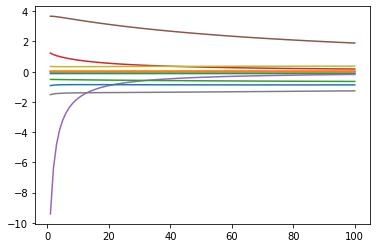

In [46]:
alphas = np.linspace(1, 100, 100)

weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    ridge_regressor = Ridge(alpha)
    ridge_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, ridge_regressor.coef_.reshape(-1, 1)))
plt.plot(alphas, weights.T)
plt.show()

Lasso одинаково сильно штрафует малые и большие веса, поэтому при достаточно большом коэффициенте регуляризации многие признаки становятся равными нулю, при этом остаются только наиболее инфромативные. Этот факт можно использовать для решения задачи отбора признаков.

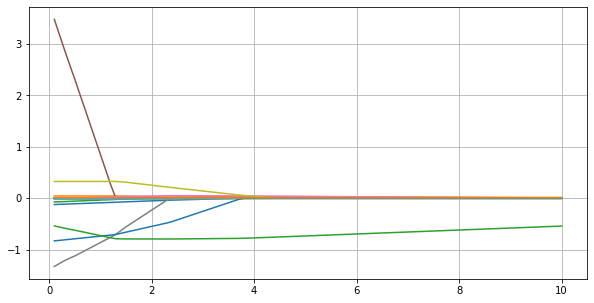

In [47]:
alphas = np.linspace(0.1, 10, 100)

plt.figure(figsize=(10, 5))
weights = np.empty((len(X.columns), 0))
for alpha in alphas:
    lasso_regressor = Lasso(alpha)
    lasso_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, lasso_regressor.coef_.reshape(-1, 1)))
plt.plot(alphas, weights.T)
plt.grid()
plt.show()

## Обучение Ridge и Lasso
Обучим модели Ridge и Lasso и подсчитайте ошибку на тесте. Постараемся подобрать лучшие параметры регуляризации.

In [ ]:
# ВАШ КОД

## Логистическая регрессия
Логистическая регрессия --- это линейный алгоритм классификации, основанный на оптимизации логистической функции потерь:

$$-\sum\limits_{y^i = 1} \ln \sigma(\langle x^i, w \rangle) - \sum\limits_{y^i = -1} \ln (1 - \sigma(\langle x^i, w \rangle)) \rightarrow \min\limits_{w}.$$

С помощью функции сигмоиды: 
$ \sigma(t) = \frac{1}{1 + e^{-t}} $ 
можно вычислять вероятность принадлежности объекта классу 1 против класса -1 по формуле 
$$p(\text{класс 1}) = \sigma(\langle x, w \rangle).$$

В данном разделе семинара мы проведём эксперимент с логистической регрессией на искусственных данных. Для начала визуализируем сигмоиду.

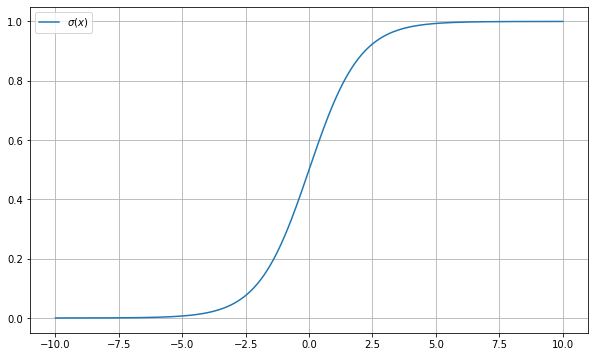

In [48]:
grid = np.linspace(-10, 10, 300)

plt.figure(figsize=(10,6))
plt.plot(grid, 1. / (1 + np.exp(-grid)), label='$\sigma(x)$')
plt.legend()
plt.grid(True)
plt.show()

### Генерация данных

Создадим два кластера с данными для решения задачи классификации c помощью sklearn.datasets.make_blobs.

In [49]:
from sklearn.datasets import make_blobs

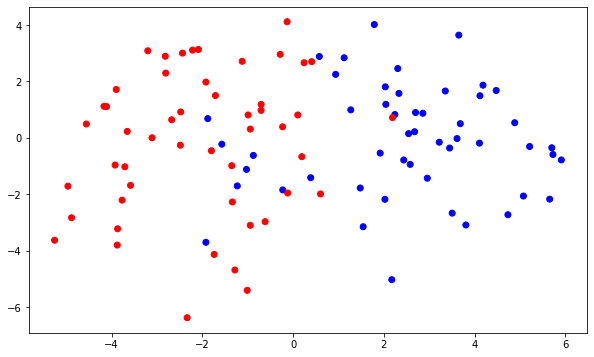

In [50]:
colors = ("red", "blue")
X, y = make_blobs(n_samples=100, centers=[[-2,0], [2,0]], random_state=20, cluster_std=2)

colored_y = np.zeros(y.size, dtype=str)
for i in range(2):
    colored_y[y == i] = colors[i]

plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)

### Обучение логистической регрессии

Обучим логистическую регрессию на наших данных. Модель можно найти всё в том же модуле sklearn.linear_model.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Создайте переменную model, в которую поместите LogisticRegression. Обучите её

Выведем обученные параметры алгоритма.

In [ ]:
print("fВектор w равен {model.coef_[0]}, свободный член w равен {model.intercept_[0]}.")

Визуализируем предсказания

In [ ]:
#Параметры визуализации

x_min, x_max = -12, 12
y_min, y_max = -10, 10
h = 0.05
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

In [ ]:
plt.figure(figsize=(15,8))

plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

## Обзор основных мер качества в задаче классификации
К сожалению, для оценки качества итоговой модели далеко не всегда удается учесть ее прямое влияние на бизнес. В таких случаях стоит использовать те критерии, которые наиболее согласованы с бизнес значимостью решения. Далее рассмотрим основные способы оценки качества в задачах классификации.

### Accuracy
__Accuracy__ определяет долю правильно предсказанных меток класса к общему числу объектов. Используется почти всегда вместе с другими метриками, но не подходит для случая сильно несбалансированных классов. В таких случаях может использоваться balanced accuracy.

__Precision или же Точность__ требует выбора целевого класса. Оценивает долю объектов, отнесенных к целевому классу корректно относительно общего числа объектов, отнесенного к целевому классу.

__Recall или же Полнота__ требует выбора целевого класса. Оценивает долю объектов, отнесенных к целевому классу корректно относительно общего числа объектов целевого класса.

Для простоты можно обратиться к иллюстрации

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/495px-Precisionrecall.svg.png)
_By Walber - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=36926283_

__F-score__ – среднее гармоническое между Precision и Recall.

__ROC-AUC__ – площадь под ROC-кривой. Подходит для бинарной классификации. В многоклассовом случае рассматривает каждый класс против всех остальных. Минимальное осмысленное значение $0.5$, значение меньше сигнализирует о том, что банальная смена меток классов на противоположные даст результат выше $0.5$. Для построения информативной кривой требуется модель, которая умеет предсказывать не только метки классов, но и оценивать уверенность в том или ином предсказании. Пример можно увидеть ниже. Почитать подробнее можно [здесь](https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/).

In [ ]:
from sklearn import metrics

### Попробуем оценить качество полученной модели с помощью разных метрик
### Hint: попробуйте plot_roc_curve, precision_score, recall_score, roc_auc_score

Более подробно про практику использования линейных алгоритмов: https://scikit-learn.org/stable/modules/linear_model.html